In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import joblib

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
df = pd.read_csv('heart_attack_prediction_indonesia.csv')
df


,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158350,60,Female,Rural,Middle,0,0,199,0,79,0,...,74,79,52,238,234,Normal,0,1,0,0
158351,64,Female,Urban,Low,0,0,179,0,93,0,...,73,111,41,177,239,Normal,0,1,1,1
158352,30,Male,Urban,Middle,0,0,220,0,78,0,...,87,127,50,158,201,Abnormal,1,1,1,1
158353,74,Male,Urban,Middle,0,0,180,0,58,1,...,70,119,52,153,171,Normal,1,0,1,1


In [ ]:
df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [ ]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

,age,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
count,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000
mean,54.543778,0.299069,0.199804,199.533264,0.249901,93.268504,0.300218,6.480064,129.515772,79.490809,110.736762,49.491478,129.569916,149.715885,0.200575,0.499770,0.601029,0.401004
std,11.910897,0.457851,0.399854,39.737565,0.432957,16.382205,0.458354,1.425398,15.005641,10.002964,27.673445,9.982634,34.913318,49.023473,0.400432,0.500002,0.489688,0.490103
min,25.000000,0.000000,0.000000,100.000000,0.000000,20.000000,0.000000,3.000000,61.000000,37.000000,70.000000,8.000000,-19.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,172.000000,0.000000,82.000000,0.000000,5.492985,119.000000,73.000000,89.000000,43.000000,106.000000,116.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,199.000000,0.000000,93.000000,0.000000,6.507461,130.000000,80.000000,109.000000,49.000000,130.000000,149.000000,0.000000,0.000000,1.000000,0.000000
75%,63.000000,1.000000,0.000000,226.000000,0.000000,104.000000,1.000000,7.520640,140.000000,86.000000,130.000000,56.000000,153.000000,183.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,350.000000,1.000000,173.000000,1.000000,9.000000,199.000000,127.000000,230.000000,93.000000,282.000000,380.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print("Missing values per column:")
df.isna().sum()


Missing values per column:


age                                   0
gender                                0
region                                0
income_level                          0
hypertension                          0
diabetes                              0
cholesterol_level                     0
obesity                               0
waist_circumference                   0
family_history                        0
smoking_status                        0
alcohol_consumption               94848
physical_activity                     0
dietary_habits                        0
air_pollution_exposure                0
stress_level                          0
sleep_hours                           0
blood_pressure_systolic               0
blood_pressure_diastolic              0
fasting_blood_sugar                   0
cholesterol_hdl                       0
cholesterol_ldl                       0
triglycerides                         0
EKG_results                           0
previous_heart_disease                0


In [ ]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [ ]:
print(" Basic Info for alcohol_consumption:")
print(df['alcohol_consumption'].describe())

print("\n Unique values sample:")
print(df['alcohol_consumption'].unique()[:30])


 Basic Info for alcohol_consumption:
count        63507
unique           2
top       Moderate
freq         47725
Name: alcohol_consumption, dtype: object

 Unique values sample:
[nan 'Moderate' 'High']


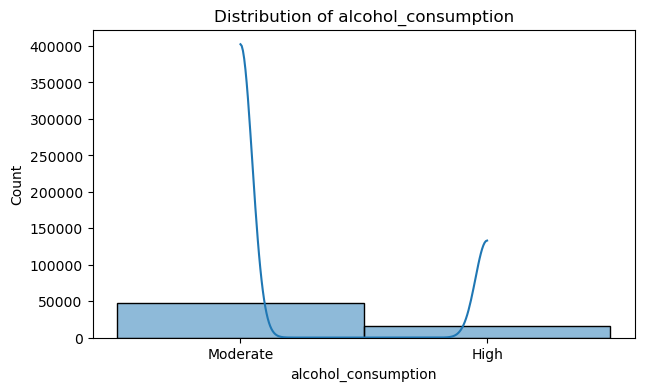

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df['alcohol_consumption'], kde=True)
plt.title("Distribution of alcohol_consumption")
plt.show()


In [ ]:
df['alcohol_consumption'].value_counts()


alcohol_consumption
Moderate    47725
High        15782
Name: count, dtype: int64

In [ ]:
(df['alcohol_consumption'].value_counts(normalize=True) * 100).round(2)


alcohol_consumption
Moderate    75.15
High        24.85
Name: proportion, dtype: float64

In [ ]:
missing = df['alcohol_consumption'].isna().sum()
missing_percentage = missing / len(df) * 100
missing, missing_percentage


(94848, 59.89580373212087)

In [ ]:
df.groupby('alcohol_consumption')['heart_attack'].mean()


alcohol_consumption
High        0.407806
Moderate    0.404086
Name: heart_attack, dtype: float64

In [ ]:
df.drop(columns=['alcohol_consumption'], inplace=True)
print("Missing values per column:")
df.isna().sum()


Missing values per column:


age                               0
gender                            0
region                            0
income_level                      0
hypertension                      0
diabetes                          0
cholesterol_level                 0
obesity                           0
waist_circumference               0
family_history                    0
smoking_status                    0
physical_activity                 0
dietary_habits                    0
air_pollution_exposure            0
stress_level                      0
sleep_hours                       0
blood_pressure_systolic           0
blood_pressure_diastolic          0
fasting_blood_sugar               0
cholesterol_hdl                   0
cholesterol_ldl                   0
triglycerides                     0
EKG_results                       0
previous_heart_disease            0
medication_usage                  0
participated_in_free_screening    0
heart_attack                      0
dtype: int64

Categorical Variables Analysis

In [ ]:
from scipy.stats import chi2_contingency

# Selecting the category from the original df

cat_cols = df.select_dtypes(include=['object']).columns.tolist()

chi2_results = []
for col in cat_cols:
    table = pd.crosstab(df[col], df['heart_attack'])
    chi2, p, dof, ex = chi2_contingency(table)
    chi2_results.append({'Feature': col, 'Chi2': chi2, 'p-value': p})

chi2_df = pd.DataFrame(chi2_results).sort_values(by='Chi2', ascending=False)
chi2_df


,Feature,Chi2,p-value
3,smoking_status,4622.835716,0.000000
1,region,4.915890,0.026611
6,air_pollution_exposure,4.818332,0.089890
5,dietary_habits,4.378476,0.036396
4,physical_activity,3.709468,0.156495
7,stress_level,3.332635,0.188942
0,gender,1.927353,0.165048
8,EKG_results,1.043397,0.307033
2,income_level,0.777331,0.677961


Numeric Variables Analysis

In [ ]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'heart_attack' in numeric_features:
    numeric_features.remove('heart_attack')

categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

Numeric Features: ['age', 'hypertension', 'diabetes', 'cholesterol_level', 'obesity', 'waist_circumference', 'family_history', 'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides', 'previous_heart_disease', 'medication_usage', 'participated_in_free_screening']
Categorical Features: ['gender', 'region', 'income_level', 'smoking_status', 'physical_activity', 'dietary_habits', 'air_pollution_exposure', 'stress_level', 'EKG_results']


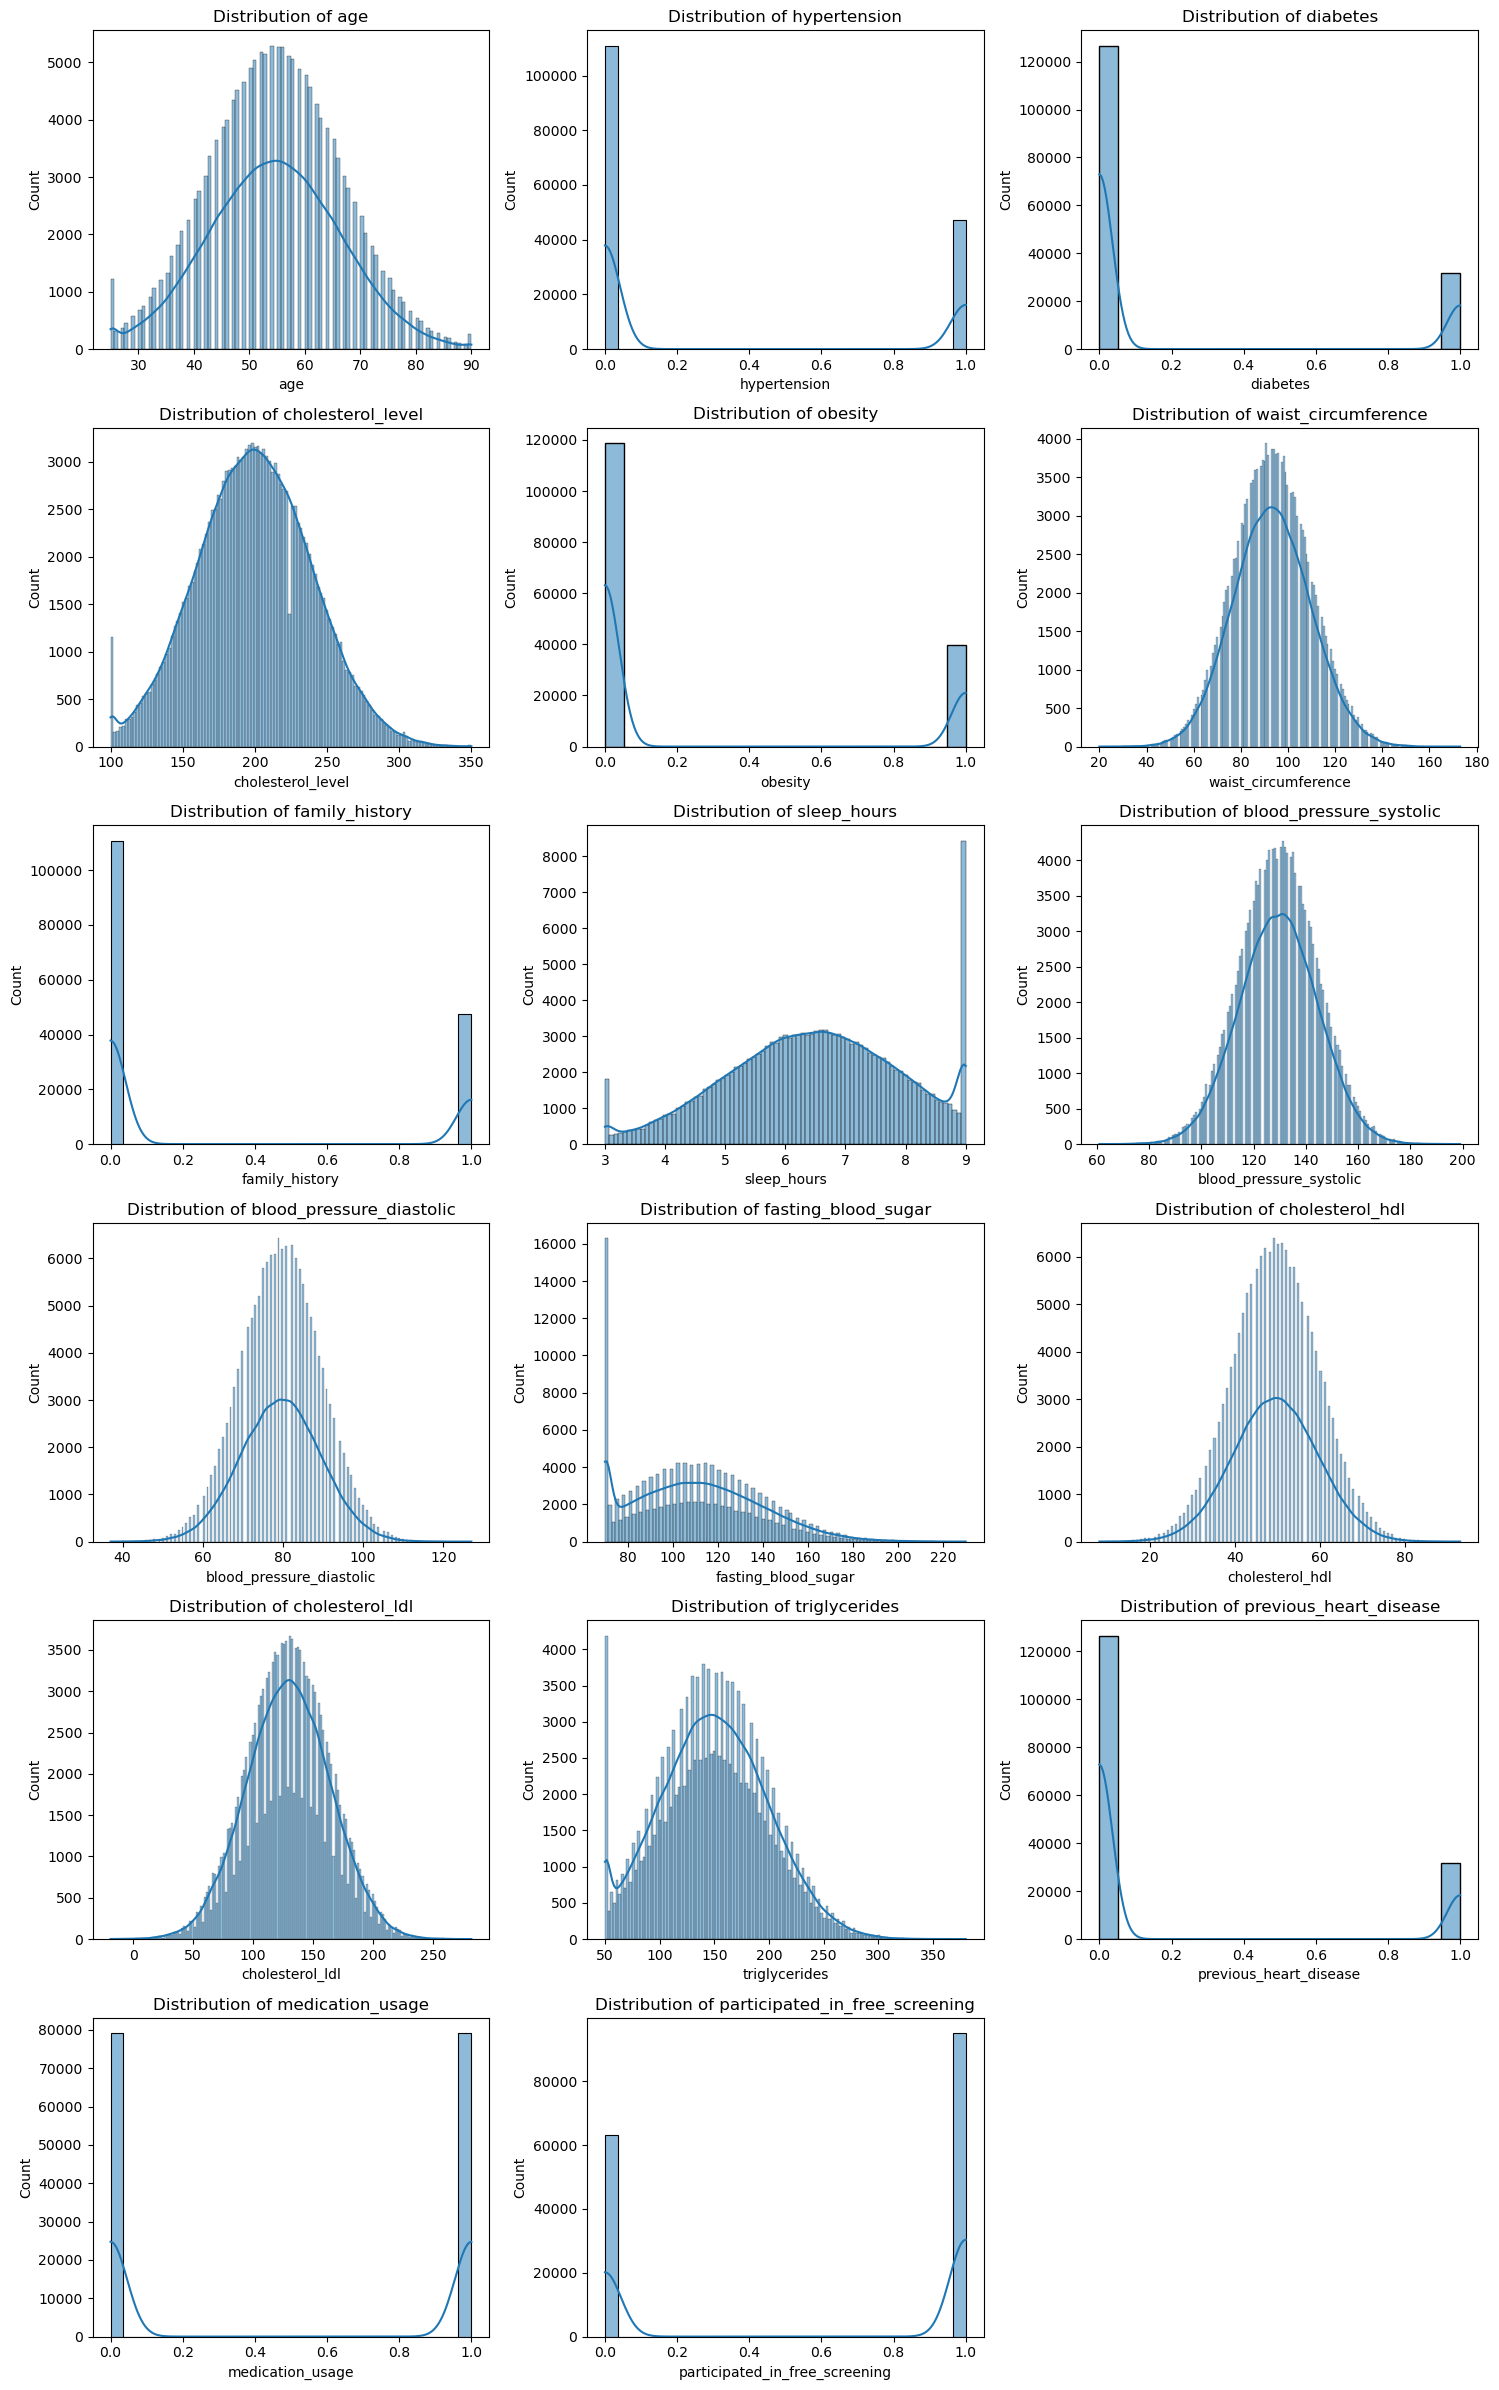

In [ ]:
# Determine the number of columns in the figure
n_cols = 3
n_rows = (len(numeric_features) + n_cols - 1) // n_cols  # Calculate the number of rows required


fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # To facilitate access to each subplot

for i, col in enumerate(numeric_features):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Remove any empty hubs if present
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

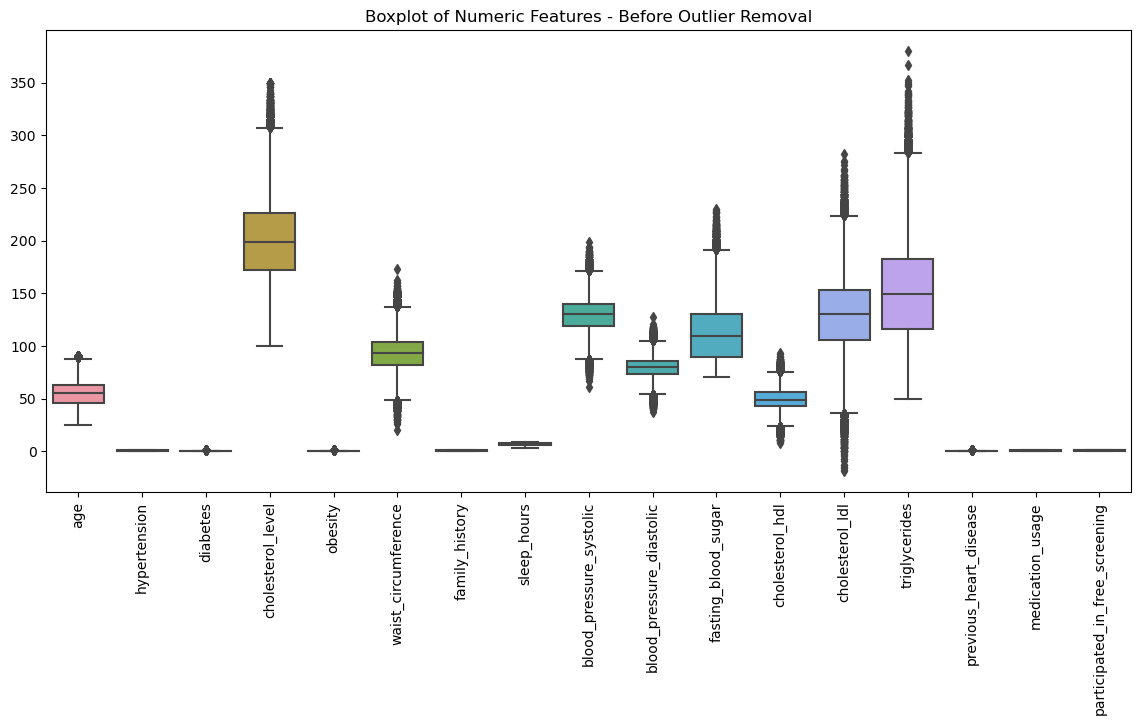

In [ ]:
# Boxplot for numeric features to identify outliers
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numeric_features])
plt.title("Boxplot of Numeric Features - Before Outlier Removal")
plt.xticks(rotation=90)
plt.show()


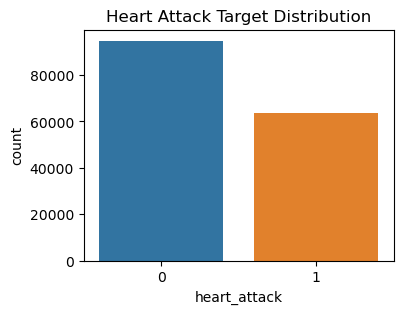

In [ ]:
# Target distribution
plt.figure(figsize=(4,3))
sns.countplot(x='heart_attack', data=df)
plt.title('Heart Attack Target Distribution')
plt.show()

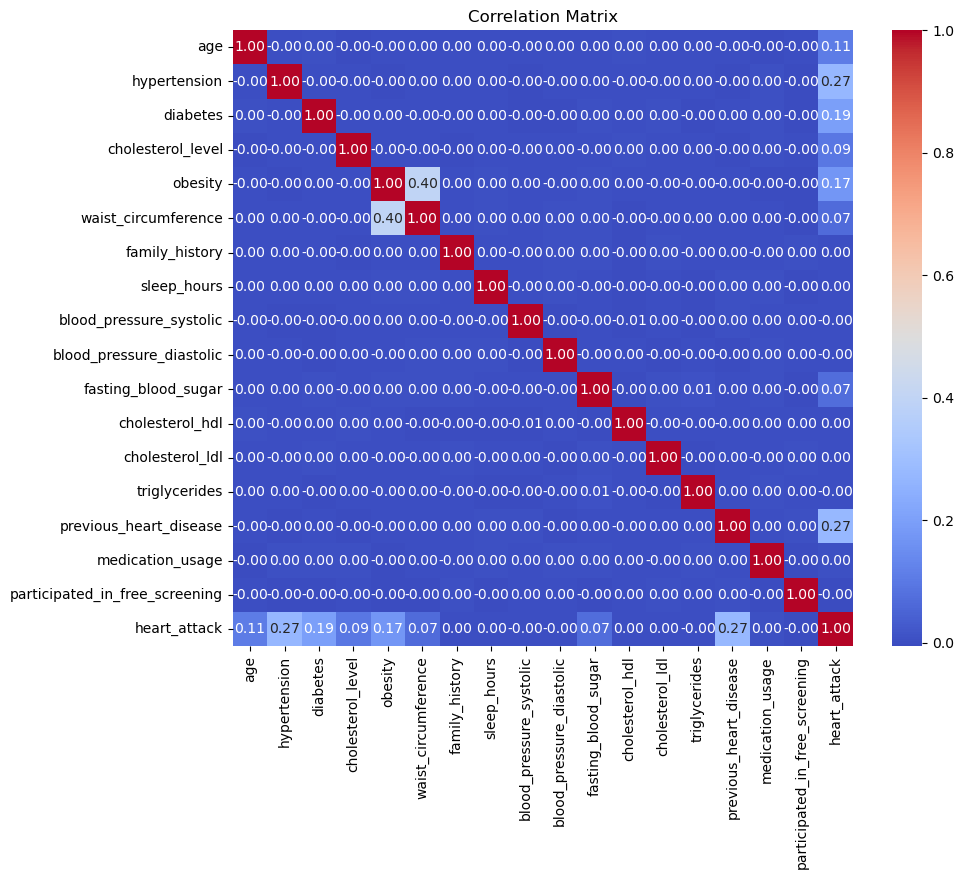

In [ ]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_features + ['heart_attack']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Choosing numerical variables
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'heart_attack' in numeric_features:
    numeric_features.remove('heart_attack')

# Calculate correlation with the target directly from the original DataFrame

corr_df = df[numeric_features + ['heart_attack']].corr()['heart_attack'].sort_values(ascending=False)
print("Correlation with Heart Attack:")
print(corr_df)


Correlation with Heart Attack:
heart_attack                      1.000000
previous_heart_disease            0.274775
hypertension                      0.269261
diabetes                          0.194512
obesity                           0.171720
age                               0.105756
cholesterol_level                 0.092611
fasting_blood_sugar               0.069826
waist_circumference               0.067883
medication_usage                  0.004694
family_history                    0.001374
sleep_hours                       0.000673
cholesterol_hdl                   0.000648
cholesterol_ldl                   0.000632
blood_pressure_diastolic         -0.000301
triglycerides                    -0.000709
blood_pressure_systolic          -0.001644
participated_in_free_screening   -0.003656
Name: heart_attack, dtype: float64


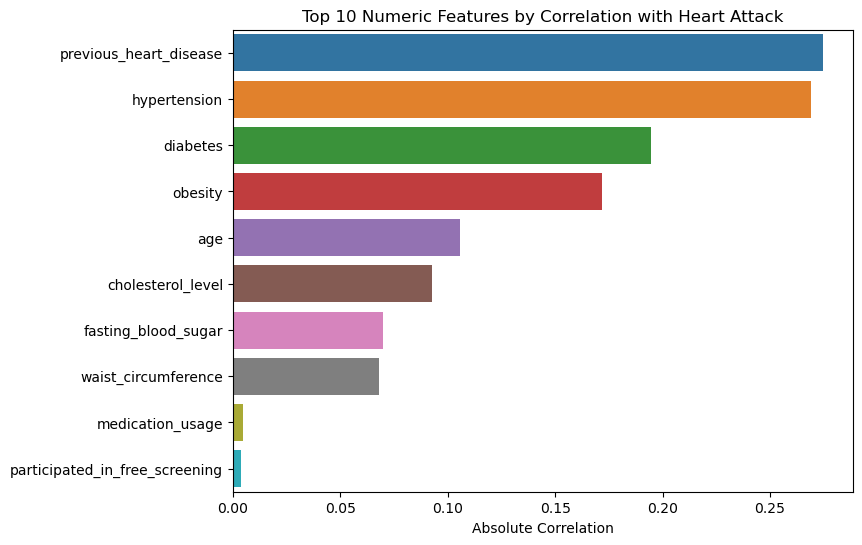

In [ ]:
top_numeric = corr_df.drop('heart_attack').abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_numeric.values, y=top_numeric.index)
plt.title('Top 10 Numeric Features by Correlation with Heart Attack')
plt.xlabel('Absolute Correlation')
plt.show()

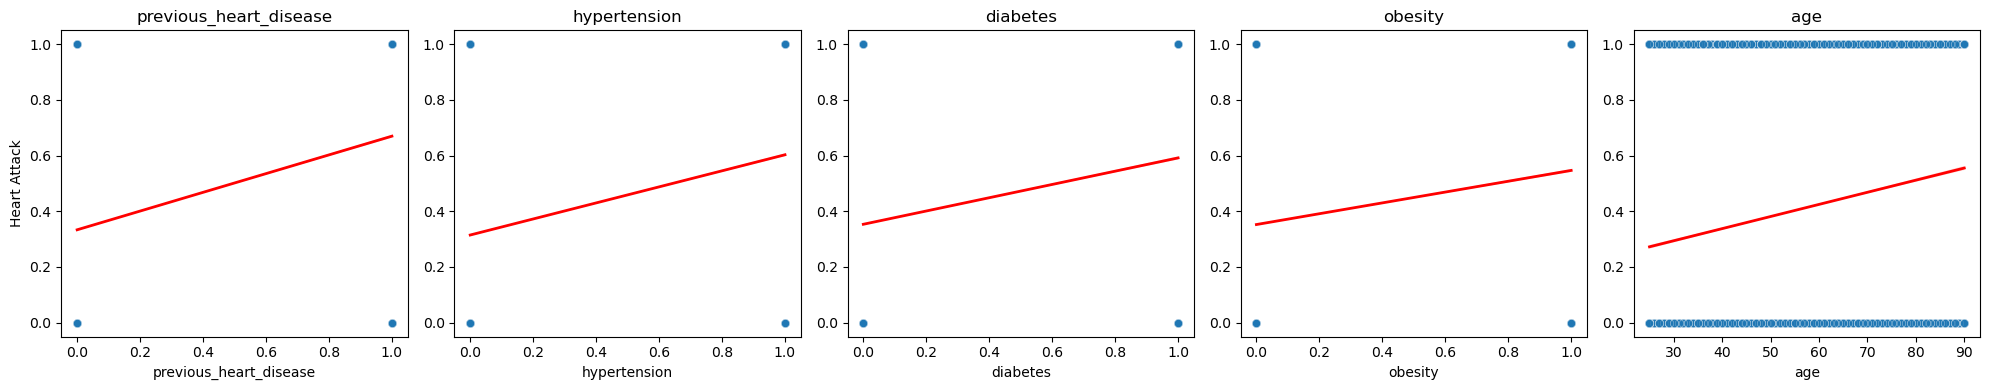

In [ ]:
# Draw scatter plots with trend lines for the top 5 numerical variables associated with the target

top_5_numeric = corr_df.drop('heart_attack').abs().sort_values(ascending=False).head(5).index.tolist()
fig, axes = plt.subplots(1, 5, figsize=(20,4))  

for i, col in enumerate(top_5_numeric):
    sns.scatterplot(x=df[col], y=df['heart_attack'], alpha=0.3, ax=axes[i])
    sns.regplot(x=df[col], y=df['heart_attack'], scatter=False, color='red', line_kws={"linewidth":2}, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Heart Attack" if i==0 else "") 
plt.tight_layout()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


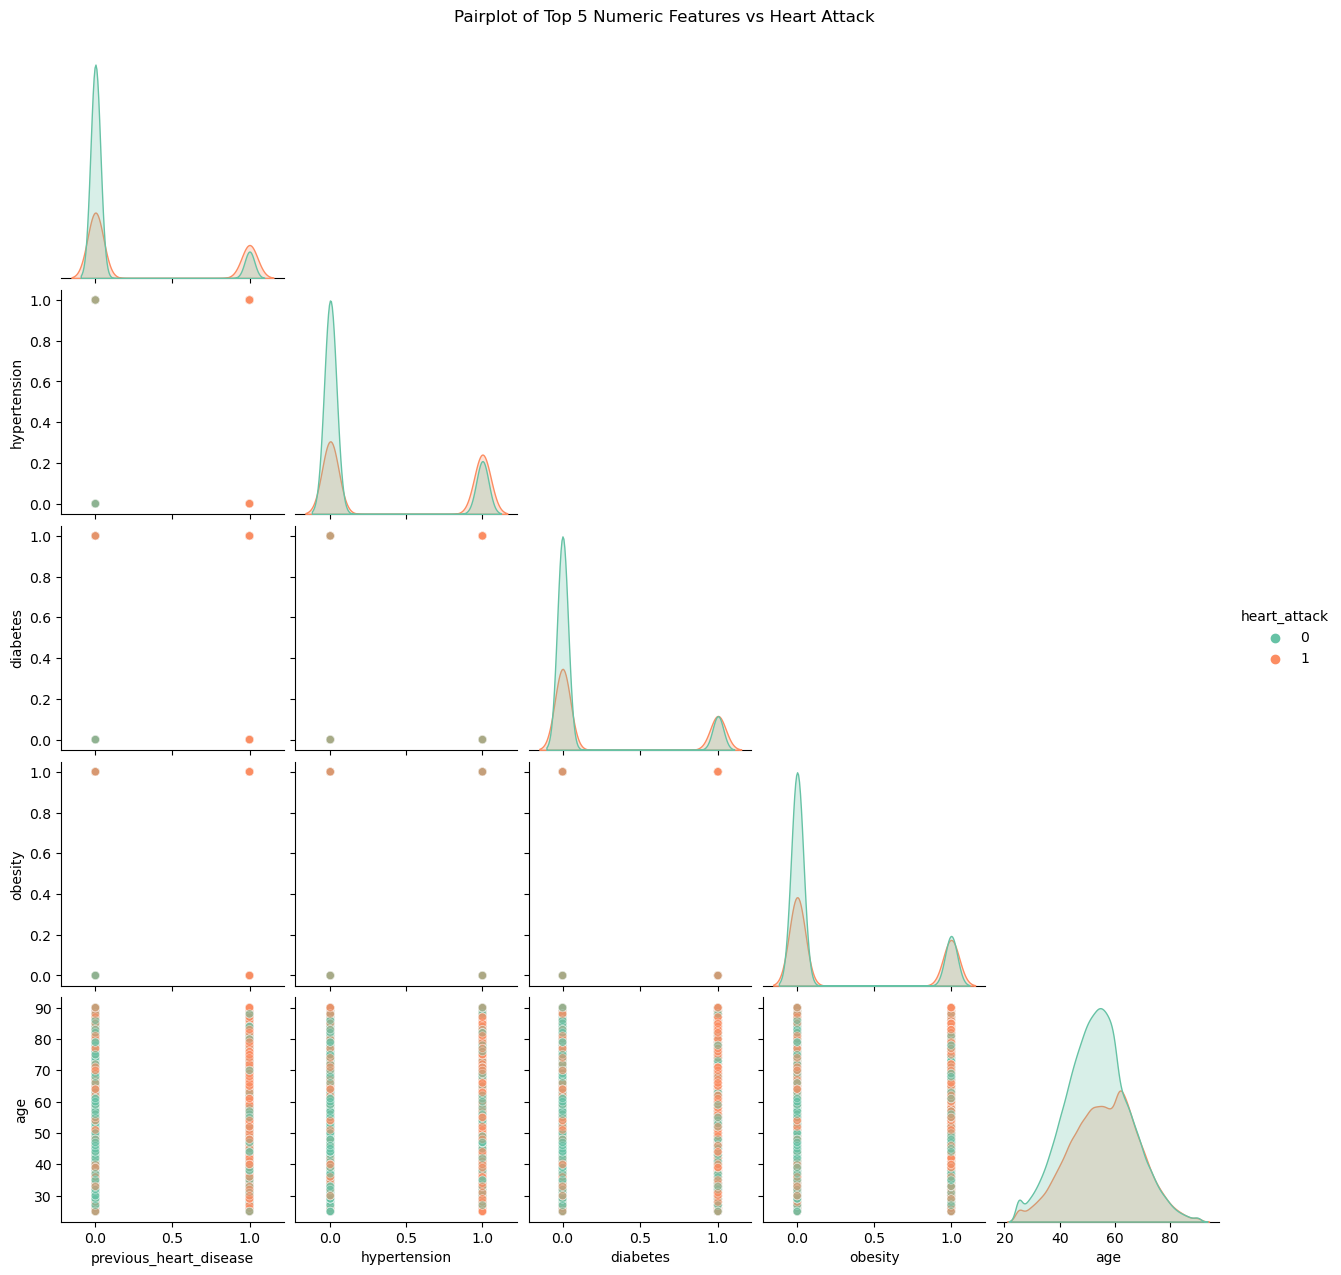

In [ ]:

# Prepare a temporary DataFrame for pairplot
df_pair = df[top_5_numeric + ['heart_attack']].copy()
df_pair['heart_attack'] = df_pair['heart_attack'].astype('category')

# Create pairplot
sns.pairplot(df_pair, hue='heart_attack', diag_kind='kde', corner=True, 
             palette='Set2', plot_kws={'alpha':0.5})
plt.suptitle("Pairplot of Top 5 Numeric Features vs Heart Attack", y=1.02)
plt.show()


In [ ]:
# Numeric & categorical features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'heart_attack' in numeric_features:
    numeric_features.remove('heart_attack')

categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
# Numeric transformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), categorical_features)
])

preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'hypertension', 'diabetes',
                                  'cholesterol_level', 'obesity',
                                  'waist_circumference', 'family_history',
                                  'sleep_hours', 'blood_pressure_systolic',
                                  'blood_pressure_diastolic',
                                  'fasting_blood_sugar', 'cholesterol_hdl',
                                  'cholesterol_ldl', 'triglycerides',
                                  'previous_heart_disease', 'medication_usage',
                                  'participated_in_free_screening']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['gender', 'region', 'income_level',
                                  'smoking_status', 'physical_activity',
                                  'dietary_habits', 'air_pollution_exposure',
                                  'stress_level', 'EKG_results'])])

In [ ]:

# Split features and target
X = df.drop(columns=['heart_attack'])
y = df['heart_attack']

X.shape, y.shape

((158355, 26), (158355,))

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#  Extract names from OneHotEncoder
cat_ohe = preprocessor.named_transformers_['cat']
cat_cols = cat_ohe.get_feature_names_out(categorical_features).tolist() if categorical_features else []
len(cat_cols), cat_cols[:10]  #first 10 categorical feature names



(23,
 ['gender_Female',
  'gender_Male',
  'region_Rural',
  'region_Urban',
  'income_level_High',
  'income_level_Low',
  'income_level_Middle',
  'smoking_status_Current',
  'smoking_status_Never',
  'smoking_status_Past'])

In [ ]:
df_train = pd.DataFrame(X_train_prep, columns=numeric_features + cat_cols)
df_train['heart_attack'] = y_train.values


In [ ]:
# Separate the dataset into class 0 and class 1
df_class0 = df_train[df_train['heart_attack'] == 0]
df_class1 = df_train[df_train['heart_attack'] == 1]

# Oversample the minority class (class 1)
df_class1_over = df_class1.sample(len(df_class0), replace=True, random_state=42)

# Combine the data after balancing and shuffle
df_train_bal = pd.concat([df_class0, df_class1_over]).sample(frac=1, random_state=42)

# Separate features and target
X_train_bal = df_train_bal.drop(columns=['heart_attack']).values
y_train_bal = df_train_bal['heart_attack'].values

# Display class distribution after balancing
class_dist = pd.Series(y_train_bal).value_counts(normalize=True) * 100
print("Class distribution after manual oversampling (%):")
print(class_dist)



Class distribution after manual oversampling (%):
0    50.0
1    50.0
Name: proportion, dtype: float64


In [ ]:
# Check class distribution
class_counts = df['heart_attack'].value_counts()
class_percent = df['heart_attack'].value_counts(normalize=True) * 100

print("Class counts:\n", class_counts)
print("\nClass distribution (%):\n", class_percent)


Class counts:
 heart_attack
0    94854
1    63501
Name: count, dtype: int64

Class distribution (%):
 heart_attack
0    59.899593
1    40.100407
Name: proportion, dtype: float64


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from sklearn.ensemble import HistGradientBoostingClassifier

def evaluate_model(model, X_train, y_train, X_test, y_test, threshold=0.5):
    """
    Train and evaluate a model. 
    Returns a dictionary of key metrics.
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities and convert to binary using the threshold
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)
    
    # Return evaluation metrics
    return {
        "ROC-AUC": roc_auc_score(y_test, y_proba),
        "F1-score": f1_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    }

# Example model
model = HistGradientBoostingClassifier(random_state=42)

#  Without upsampling ---
metrics_no_upsample = evaluate_model(model, X_train_prep, y_train, X_test_prep, y_test)
print("Metrics without upsampling:")
print(metrics_no_upsample)

#  With upsampling ---
metrics_upsample = evaluate_model(model, X_train_bal, y_train_bal, X_test_prep, y_test)
print("\nMetrics with upsampling:")
print(metrics_upsample)


Metrics without upsampling:
{'ROC-AUC': 0.813794841027561, 'F1-score': 0.6454434585138147, 'Precision': 0.6926617925805578, 'Recall': 0.604251968503937}

Metrics with upsampling:
{'ROC-AUC': 0.8135198917369528, 'F1-score': 0.6835223578704038, 'Precision': 0.6313892966768985, 'Recall': 0.7450393700787401}


In [ ]:
#  Compare basic models on balanced dataset ---
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=1),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=50, random_state=42)
}

results = []

for name, model in models.items():
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_bal, y_train_bal, cv=cv, scoring='roc_auc', n_jobs=1)
    
    results.append({
        "Model": name,
        "Fold1_ROC-AUC": scores[0],
        "Fold2_ROC-AUC": scores[1],
        "Fold3_ROC-AUC": scores[2],
        "Min_ROC-AUC": np.min(scores),
        "Max_ROC-AUC": np.max(scores),
        "Median_ROC-AUC": np.median(scores)
    })

results_df = pd.DataFrame(results)
print("=== CV ROC-AUC on Balanced Training Set ===")
display(results_df)

=== CV ROC-AUC on Balanced Training Set ===


,Model,Fold1_ROC-AUC,Fold2_ROC-AUC,Fold3_ROC-AUC,Min_ROC-AUC,Max_ROC-AUC,Median_ROC-AUC
0,LogisticRegression,0.803182,0.803538,0.806776,0.803182,0.806776,0.803538
1,RandomForest,0.921514,0.922496,0.924045,0.921514,0.924045,0.922496
2,GradientBoosting,0.817949,0.816410,0.820035,0.816410,0.820035,0.817949


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import make_scorer, f1_score

# 1️⃣ Take a small sample for faster tuning
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train_bal, y_train_bal, train_size=0.2, stratify=y_train_bal, random_state=42
)

# 2️⃣ Define Random Forest and parameter distributions
rf_model = RandomForestClassifier(random_state=42, n_jobs=1)

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}

f1_scorer = make_scorer(f1_score, pos_label=1)
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring=f1_scorer,
    cv=cv,
    n_jobs=1,
    random_state=42,
    verbose=2
)

# 3️⃣ Fit RandomizedSearchCV
random_search.fit(X_train_sample, y_train_sample)
best_model = random_search.best_estimator_

print("=== Best Parameters ===")
print(random_search.best_params_)
print("Best CV F1-score (class 1):", random_search.best_score_)


Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.4s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   2.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; tota

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

# --- Final Model with best hyperparameters (temporarily fewer trees for faster testing) ---
final_model = RandomForestClassifier(
    n_estimators=50,        # temporarily fewer trees for speed; can increase to 200 later
    min_samples_split=5,
    min_samples_leaf=5,
    max_features='sqrt',
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

# Train the model on the balanced training set
final_model.fit(X_train_bal, y_train_bal)

# Predict probabilities and apply threshold
y_proba = final_model.predict_proba(X_test_prep)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)  # temporary threshold = 0.5

# --- Evaluation ---
metrics_df = pd.DataFrame({
    "Metric": ["ROC-AUC", "Accuracy", "Precision (class 1)", "Recall (class 1)", "F1-score (class 1)"],
    "Score": [
        roc_auc_score(y_test, y_proba),
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
})

print("=== Evaluation on Test Set ===")
display(metrics_df)

# --- Confusion Matrix ---
cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                  index=["Actual 0", "Actual 1"],
                  columns=["Predicted 0", "Predicted 1"])
print("\nConfusion Matrix:")
display(cm)

# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


=== Evaluation on Test Set ===


,Metric,Score
0,ROC-AUC,0.807729
1,Accuracy,0.728932
2,Precision (class 1),0.660079
3,Recall (class 1),0.668031
4,F1-score (class 1),0.664032



Confusion Matrix:


,Pred 0,Pred 1
Actual 0,14602,4369
Actual 1,4216,8484



Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77     18971
           1       0.66      0.67      0.66     12700

    accuracy                           0.73     31671
   macro avg       0.72      0.72      0.72     31671
weighted avg       0.73      0.73      0.73     31671



In [ ]:
# Threshold tuning with processed test set
y_proba = best_model.predict_proba(X_test_prep)[:, 1]

thresholds = np.arange(0.2, 0.51, 0.01)
threshold_results = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    threshold_results.append({
        "Threshold": t,
        "Precision_class1": precision_score(y_test, y_pred_t),
        "Recall_class1": recall_score(y_test, y_pred_t),
        "F1_class1": f1_score(y_test, y_pred_t)
    })

threshold_df = pd.DataFrame(threshold_results)
best_idx = threshold_df["F1_class1"].idxmax()
best_threshold = threshold_df.loc[best_idx, "Threshold"]

print("\nBest Threshold based on F1-score for class 1:", best_threshold)
display(threshold_df)



Best Threshold based on F1-score for class 1: 0.4100000000000002


,Threshold,Precision_class1,Recall_class1,F1_class1
0,0.20,0.470066,0.991654,0.637800
1,0.21,0.472981,0.989685,0.640067
2,0.22,0.476040,0.986378,0.642163
3,0.23,0.479823,0.983071,0.644886
4,0.24,0.483377,0.977717,0.646921
5,0.25,0.487403,0.973386,0.649555
6,0.26,0.492308,0.967559,0.652576
7,0.27,0.496984,0.960157,0.654958
8,0.28,0.501758,0.954961,0.657861
9,0.29,0.506712,0.948189,0.660469


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib
import pandas as pd

# --- Train final model on balanced dataset ---
final_model = RandomForestClassifier(
    n_estimators=200,          # Best value from hyperparameter tuning
    min_samples_split=5,
    min_samples_leaf=5,
    max_features='sqrt',
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

# Train the model on the balanced training set
final_model.fit(X_train_bal, y_train_bal)


# IMPORTANT: Use the preprocessed test set to avoid errors with categorical features
# Example: X_test_prep = preprocessor.transform(X_test)
y_proba = final_model.predict_proba(X_test_prep)[:, 1]  
y_pred = (y_proba >= best_threshold).astype(int)

# --- Evaluation ---
metrics_df = pd.DataFrame({
    "Metric": ["ROC-AUC", "Accuracy", "Precision (class 1)", "Recall (class 1)", "F1-score (class 1)"],
    "Score": [
        roc_auc_score(y_test, y_proba),
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
})

print(f"=== Evaluation on Test Set (Threshold {best_threshold}) ===")
display(metrics_df)

# --- Confusion Matrix ---
cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                  index=["Actual 0", "Actual 1"],
                  columns=["Predicted 0", "Predicted 1"])
print("\nConfusion Matrix:")
display(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- Save the trained model ---
joblib.dump(final_model, "heart_attack_final_model.pkl")
print("\nFinal model saved as 'heart_attack_final_model.pkl'")


=== Evaluation on Test Set (Threshold 0.41) ===


,Metric,Score
0,ROC-AUC,0.810407
1,Accuracy,0.703293
2,Precision (class 1),0.596902
3,Recall (class 1),0.801024
4,F1-score (class 1),0.684060



Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,12101,6870
Actual 1,2527,10173



Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.64      0.72     18971
           1       0.60      0.80      0.68     12700

    accuracy                           0.70     31671
   macro avg       0.71      0.72      0.70     31671
weighted avg       0.73      0.70      0.71     31671


Final model saved as 'heart_attack_final_model.pkl'


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier 

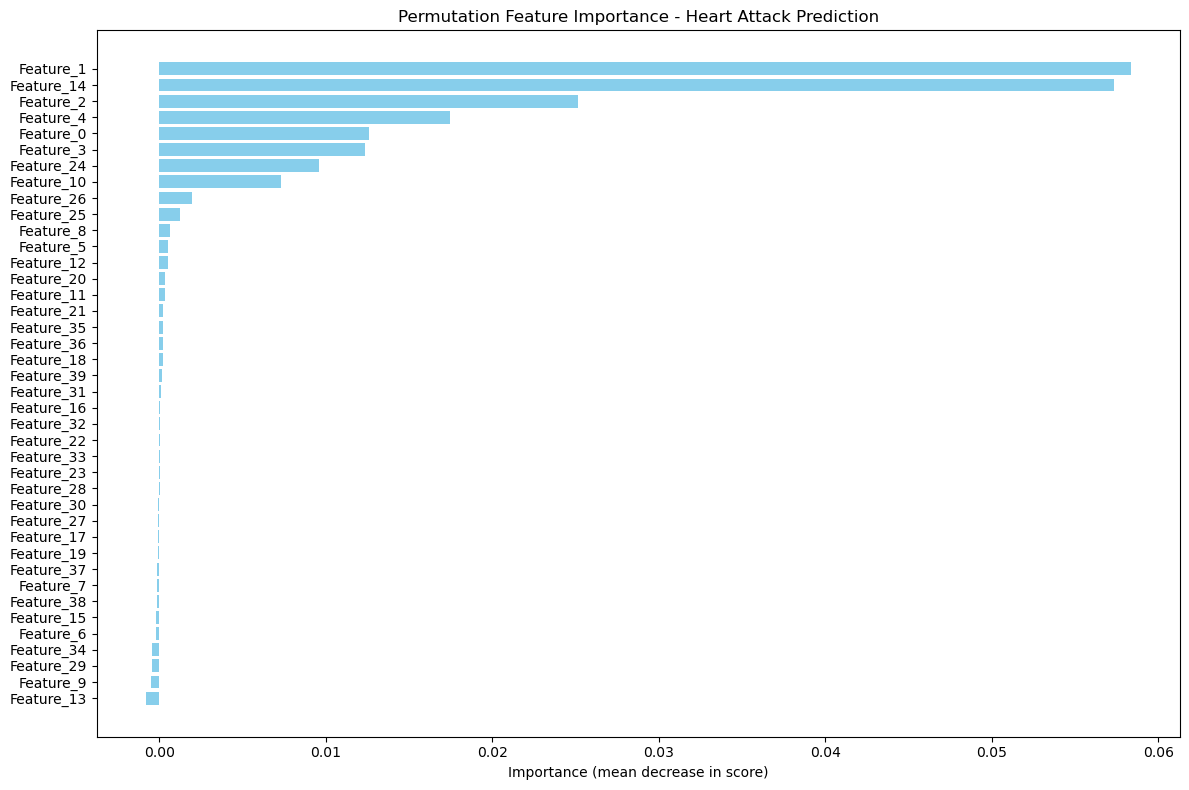

Top 10 Important Features:


,Feature,Importance
1,Feature_1,0.058350
14,Feature_14,0.057340
2,Feature_2,0.025140
4,Feature_4,0.017458
0,Feature_0,0.012620
3,Feature_3,0.012352
24,Feature_24,0.009580
10,Feature_10,0.007287
26,Feature_26,0.001980
25,Feature_25,0.001216


In [ ]:
# %% Permutation Feature Importance
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# X_test_prep: الـ test set بعد preprocessing (numpy array)
# نحولها إلى DataFrame بأسماء أعمدة عامة
X_test_prep_df = pd.DataFrame(
    X_test_prep, 
    columns=[f"Feature_{i}" for i in range(X_test_prep.shape[1])]
)

# حساب permutation importance
perm_importance = permutation_importance(
    final_model, 
    X_test_prep_df, 
    y_test, 
    n_repeats=10, 
    random_state=42, 
    n_jobs=1
)

# إنشاء DataFrame للميزات
feat_imp_df = pd.DataFrame({
    "Feature": X_test_prep_df.columns,
    "Importance": perm_importance.importances_mean
})

# ترتيب الميزات حسب الأهمية
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)

# رسم الأعمدة
plt.figure(figsize=(12, 8))
plt.barh(feat_imp_df["Feature"], feat_imp_df["Importance"], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Permutation Feature Importance - Heart Attack Prediction")
plt.xlabel("Importance (mean decrease in score)")
plt.tight_layout()
plt.show()

# عرض أهم 10 ميزات
print("Top 10 Important Features:")
display(feat_imp_df.head(10))
